In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
df=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair trading/notebooks/Orders_strat_1.csv')
stock=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair trading/Returns data/sensex_close.csv')

In [73]:
jse=jsw.copy()
jsw=df.iloc[-8:].copy()
jsw.index=range(8)
jsw['Date']=pd.to_datetime(jsw['Date'])

In [74]:
use=use.copy()
use=stock[['Date','RELIANCE.NS(close)','JSWSTEEL.NS(close)']].copy()
use['Date']=pd.to_datetime(use['Date'])

In [75]:
#generating signals
use=use.copy()

use['signal_jsw'] = 0
use['signal_reliance'] = 0

jsw_filtered = jsw[jsw['Stock'] == 'JSWSTEEL.NS'].copy()
reliance_filtered = jsw[jsw['Stock'] == 'RELIANCE.NS'].copy()

signal_dict = {'Buy': 1, 'Sell': -1}

for _, row in jsw_filtered.iterrows():
    date = row['Date']
    order = row['Order']
    use.loc[use['Date'] == date, 'signal_jsw'] = signal_dict.get(order, 0)

for _, row in reliance_filtered.iterrows():
    date = row['Date']
    order = row['Order']
    use.loc[use['Date'] == date, 'signal_reliance'] = signal_dict.get(order, 0)


In [76]:
use

,Date,RELIANCE.NS(close),JSWSTEEL.NS(close),signal_jsw,signal_reliance
0,2011-01-03,435.470551,101.518600,0,0
1,2011-01-04,444.340057,99.524185,0,0
2,2011-01-05,443.803680,97.802521,0,0
3,2011-01-06,447.846588,93.715721,0,0
4,2011-01-07,439.513367,87.783630,0,0
...,...,...,...,...,...
3199,2023-12-22,2565.050049,855.299988,0,0
3200,2023-12-26,2578.050049,852.299988,0,0
3201,2023-12-27,2586.850098,875.900024,0,0
3202,2023-12-28,2605.550049,880.799988,0,0


In [77]:
profit = 0

for i in range(len(jsw)):
    if(jsw.iloc[i]['Order'] == 'Buy'):
        profit -= jsw.iloc[i]['Price']
    else:
        profit += jsw.iloc[i]['Price']

profit

27.09368133544922

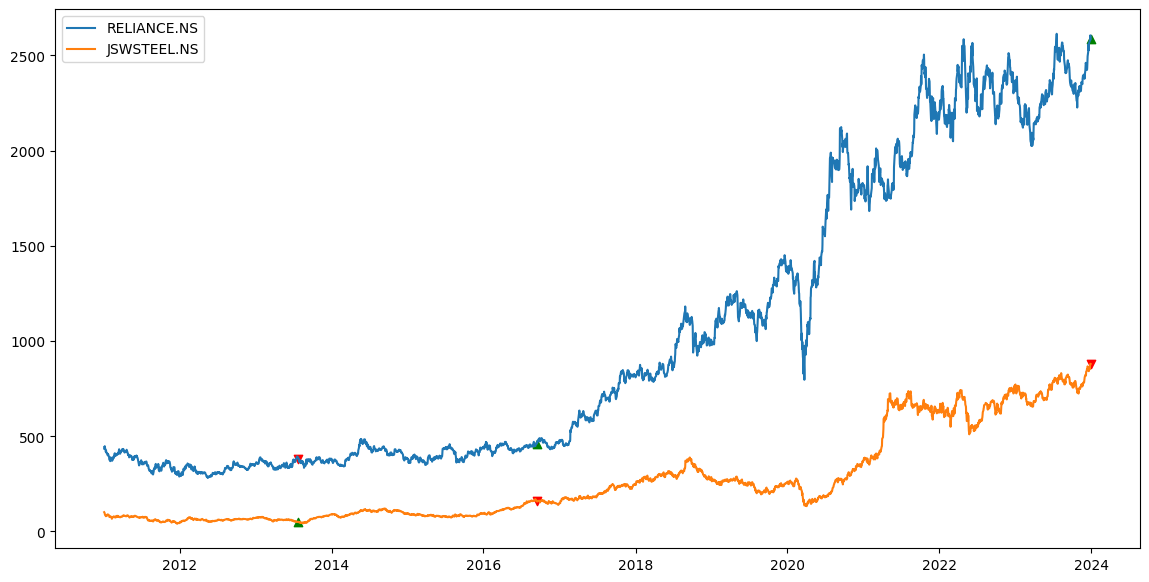

In [78]:
#plot signals for reliance and jsw on same graph
plt.figure(figsize=(14, 7))
plt.plot(use['Date'], use['RELIANCE.NS(close)'], label='RELIANCE.NS')
plt.plot(use['Date'], use['JSWSTEEL.NS(close)'], label='JSWSTEEL.NS')
plt.scatter(use[use['signal_reliance'] == 1]['Date'], use[use['signal_reliance'] == 1]['RELIANCE.NS(close)'], marker='^', color='g')
plt.scatter(use[use['signal_reliance'] == -1]['Date'], use[use['signal_reliance'] == -1]['RELIANCE.NS(close)'], marker='v', color='r')
plt.scatter(use[use['signal_jsw'] == 1]['Date'], use[use['signal_jsw'] == 1]['JSWSTEEL.NS(close)'], marker='^', color='g')
plt.scatter(use[use['signal_jsw'] == -1]['Date'], use[use['signal_jsw'] == -1]['JSWSTEEL.NS(close)'], marker='v', color='r')
plt.legend()
plt.show()